# Building a K-Nearest Neighbors Classifier

Basically a combination of K-Nearest Neighbors and K-Means Clustering.  You could even combine the two manually in a pipeline.

Good if you're interested in an overall class but you still want to be choosy about recommendations you make within a class.

In [27]:
import numpy
from matplotlib import pyplot, cm
from sklearn import neighbors
import ipywidgets as widgets

## Input Data

In [13]:
data = numpy.loadtxt("data.txt", delimiter=",")

# X: A point in 2D space
# Y: A class in {0, 1, 2, 3}
X, Y = data[:, :-1], data[:, -1].astype(int)

## Visualizing Input Data

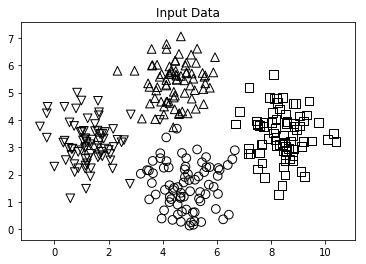

In [14]:
markers = 'v^os'
mapper = tuple(markers[i] for i in Y)

pyplot.figure()
pyplot.title("Input Data")

for i in range(X.shape[0]):
    pyplot.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, edgecolors='black', facecolors='none')

pyplot.show()

## Building the Model

In [23]:
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
xvals, yvals = numpy.meshgrid(
    numpy.arange(xmin, xmax, 0.01),
    numpy.arange(ymin, ymax, 0.01)
)

classifier = neighbors.KNeighborsClassifier(12, weights="distance", n_jobs=-1)
classifier.fit(X, Y)
output = classifier.predict(numpy.c_[xvals.ravel(), yvals.ravel()]).reshape(xvals.shape)

## Visualizing the Classifier

In [31]:
def classify(testx=5.1, testy=3.6):
    test = [testx, testy]
    _, indices = classifier.kneighbors([test])
    indices = indices.astype(int)[0]

    pyplot.figure()
    pyplot.pcolormesh(xvals, yvals, output, cmap=cm.Paired)

    for i in range(X.shape[0]):
        # For each test data point...
        pyplot.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, edgecolors='black', facecolors='none')
    
    for i in indices:
        # For each of the K nearest neighbors...
        pyplot.scatter(X[i, 0], X[i, 1], marker=mapper[Y[i]], linewidth=2, s=100, facecolors='red')
    
    pyplot.scatter(test[0], test[1], marker='x', linewidth=6, s=200, facecolors='blue')
    
    pyplot.xlim(xvals.min(), xvals.max())
    pyplot.ylim(yvals.min(), yvals.max())
    pyplot.title("K Nearest Neighbors Classifier Boundaries")
    pyplot.show()

testx = widgets.FloatSlider(value=5.1, min=0, max=11, step=0.5, description="X", continuous_update=False)
testy = widgets.FloatSlider(value=3.6, min=0, max=11, step=0.5, description="Y", continuous_update=False)

widgets.interactive(
    classify,
    testx=testx,
    testy=testy
)

interactive(children=(FloatSlider(value=5.1, continuous_update=False, description='X', max=11.0, step=0.5), Fl…